<a href="https://colab.research.google.com/github/tsholofelo-mokheleli/ACIS-2023-New-Zealand/blob/main/DiabPredict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimensionality Reduction in Machine Learning

## Import Libraries

In [8]:
# Load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
import seaborn as sns

# Scaler
from sklearn.preprocessing import StandardScaler

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Warning filter
import warnings
warnings.filterwarnings('ignore')
cmap=sns.color_palette('Blues_r')

# Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Plot Theme
sns.set_style("darkgrid")
plt.style.use("seaborn-deep")

In [9]:
data = pd.read_csv("Diabetes health indicators Multi-Class.csv", sep=';', on_bad_lines='skip')

In [10]:
data.head()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,2,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,3,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,4,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,5,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [11]:
data.shape

(253680, 23)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient               253680 non-null  int64  
 1   Diabetes_012          253680 non-null  float64
 2   HighBP                253680 non-null  float64
 3   HighChol              253680 non-null  float64
 4   CholCheck             253680 non-null  float64
 5   BMI                   253680 non-null  float64
 6   Smoker                253680 non-null  float64
 7   Stroke                253680 non-null  float64
 8   HeartDiseaseorAttack  253680 non-null  float64
 9   PhysActivity          253680 non-null  float64
 10  Fruits                253680 non-null  float64
 11  Veggies               253680 non-null  float64
 12  HvyAlcoholConsump     253680 non-null  float64
 13  AnyHealthcare         253680 non-null  float64
 14  NoDocbcCost           253680 non-null  float64
 15  

### Drop null from target var, and Convert data to Float

In [13]:
data = data.dropna()

# Convert all columns to int data type
for column in data.columns:
    data[column] = data[column].astype('float')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Patient               253680 non-null  float64
 1   Diabetes_012          253680 non-null  float64
 2   HighBP                253680 non-null  float64
 3   HighChol              253680 non-null  float64
 4   CholCheck             253680 non-null  float64
 5   BMI                   253680 non-null  float64
 6   Smoker                253680 non-null  float64
 7   Stroke                253680 non-null  float64
 8   HeartDiseaseorAttack  253680 non-null  float64
 9   PhysActivity          253680 non-null  float64
 10  Fruits                253680 non-null  float64
 11  Veggies               253680 non-null  float64
 12  HvyAlcoholConsump     253680 non-null  float64
 13  AnyHealthcare         253680 non-null  float64
 14  NoDocbcCost           253680 non-null  float64
 15  

## Data Description

In [14]:
data.describe()

,Patient,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,126840.500000,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,73231.252481,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,1.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,63420.750000,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,126840.500000,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,190260.250000,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,253680.000000,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Class Distribution

### Explore the class distribution

In [15]:
class_counts = data['Diabetes_012'].value_counts()
print(class_counts)

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64


### Visualize the class distribution

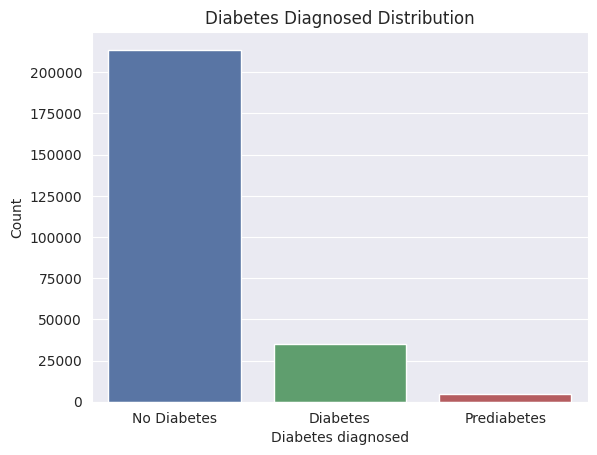

In [16]:
# Create a copy of the original dataset
new_data = data.copy()

mh_mapping = {0.0: 'No Diabetes', 1.0: 'Prediabetes', 2.0: 'Diabetes'}
new_data['dhi_label'] = new_data['Diabetes_012'].map(mh_mapping)

# Plot the distribution based on the new dataset
sns.countplot(data=new_data, x='dhi_label')
plt.xlabel('Diabetes diagnosed')
plt.ylabel('Count')
plt.title('Diabetes Diagnosed Distribution')
plt.show()

## Standardizing

In [17]:
data_x = data.drop(["Diabetes_012", "Patient"], axis=1)
data_y = data['Diabetes_012']

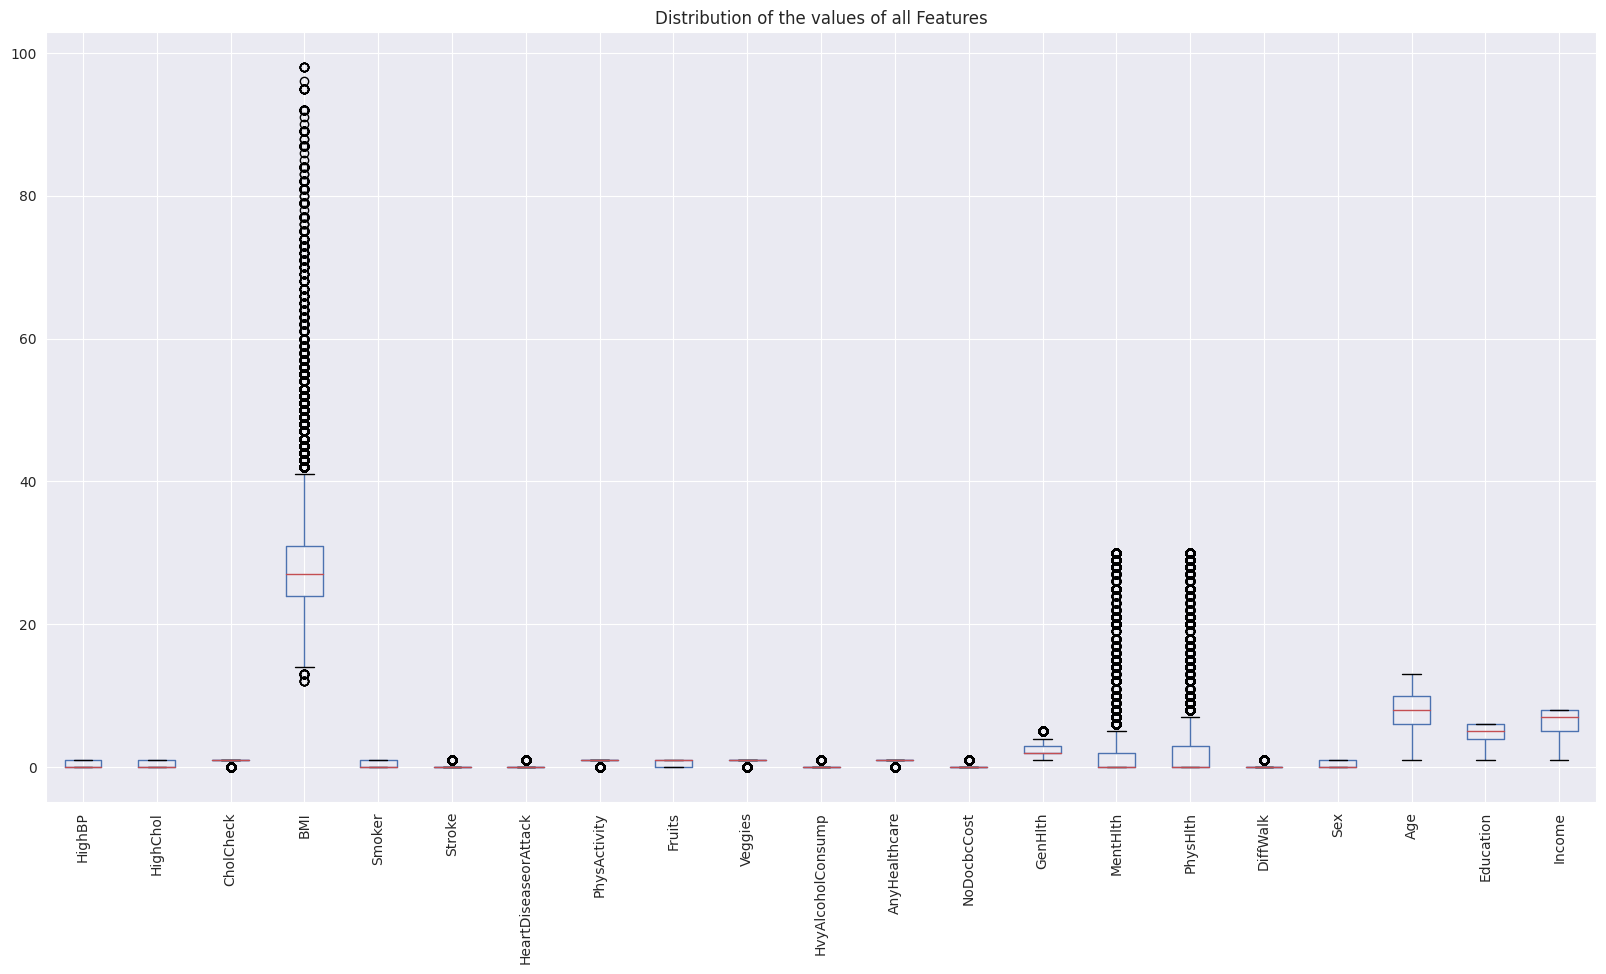

In [18]:
plt.figure(figsize=(20,10))
data_x.boxplot()
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all Features")
plt.show()

- We observe a large Scale difference between variables. We need to standardize them to avoid those with large scales wrongly have too much weight in the calculations.

- Standardizing a dataset is necessary in several situations to ensure fair and meaningful comparisons and analyses

- Because we going to apply PCA we need to standardize the data.

    - PCA aims to capture the most variance in the data. If features are on different scales, those with larger scales will contribute more to the variance, potentially overshadowing important patterns present in smaller-scaled features.

### Standardize the feature columns

In [19]:
scaler = StandardScaler()
standardized_features = scaler.fit_transform(data_x)

# Convert the standardized features back to a DataFrame
std_data = pd.DataFrame(standardized_features, columns=data_x.columns)

In [20]:
std_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,0.226863,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,-4.407954,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,0.226863,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,0.226863,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662


### Merge the data back

In [21]:
# Concatenate the standardized features with the target column
std_df = pd.concat([std_data, data_y], axis=1)

In [22]:
std_df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487,0.0
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138,0.0
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638,0.0
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012,0.0
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662,0.0


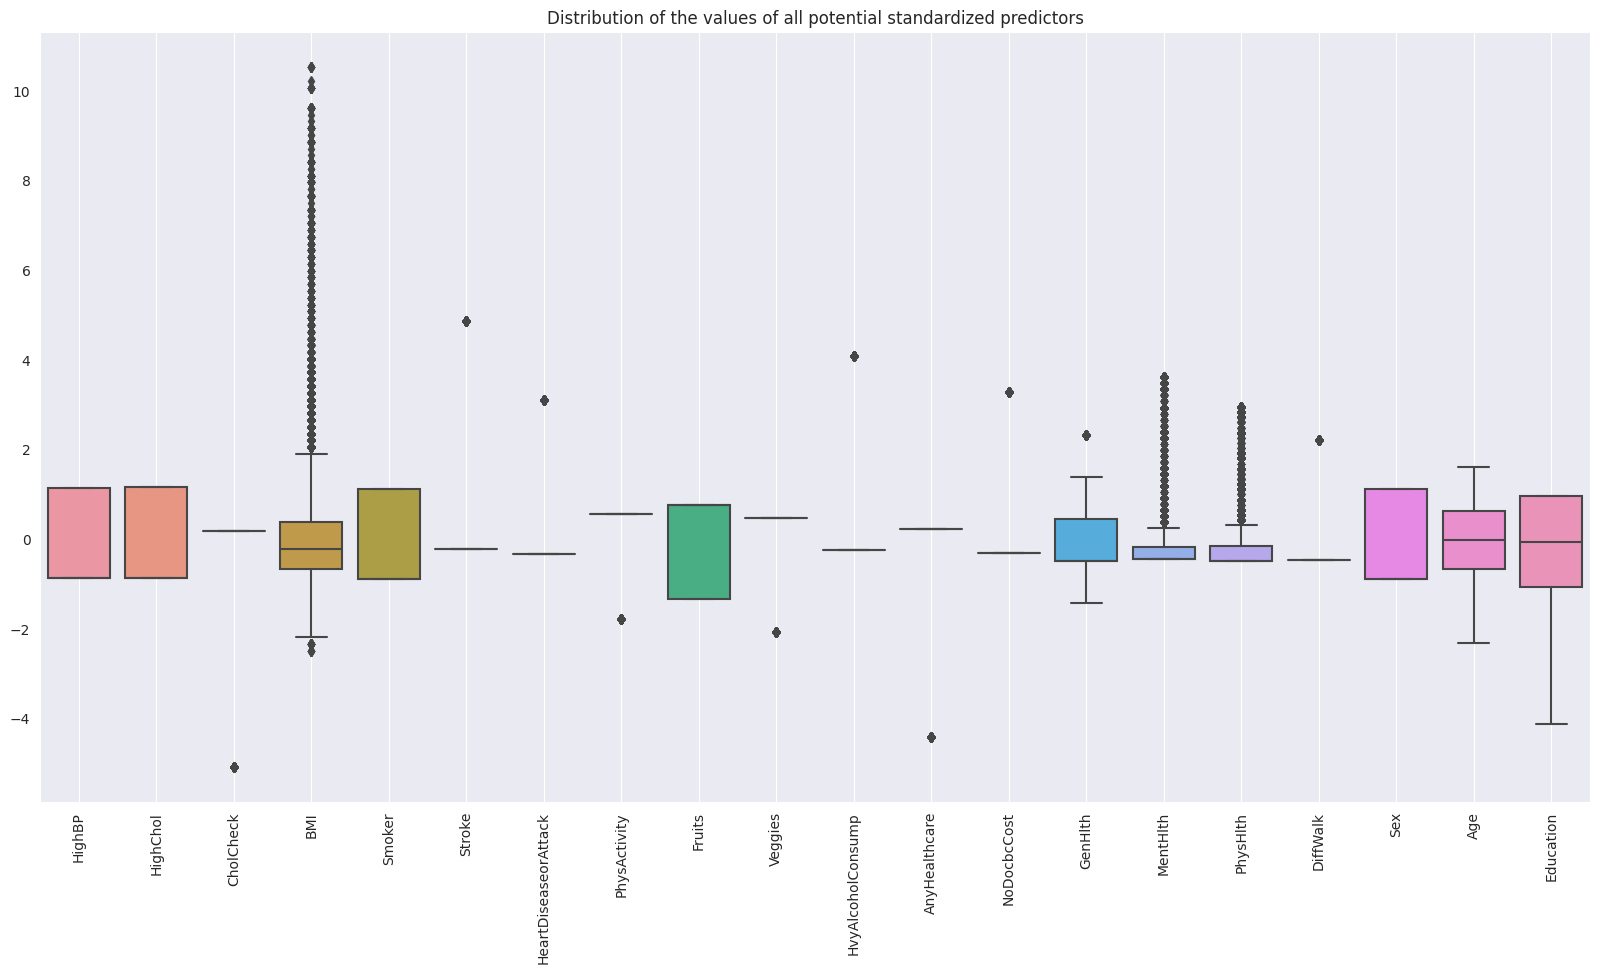

In [23]:
plt.figure(figsize=(20,10))
sea.boxplot(data=std_df.iloc[:,:-2])
plt.xticks(rotation=90)
plt.title("Distribution of the values ​​of all potential standardized predictors")
plt.grid()
plt.show()

## Correlation

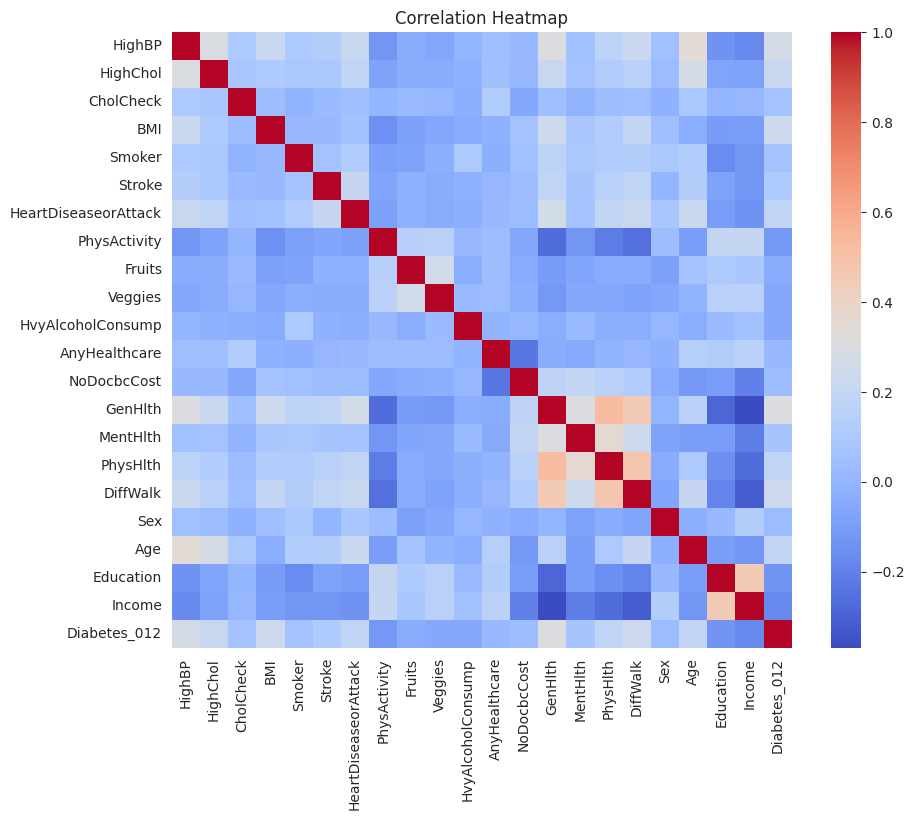

In [24]:
# Calculate the correlation matrix
correlation_matrix = std_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

## Dimensionality Reduction

### Split Dataset

In [25]:
X = std_df.iloc[:,:-2]
y = std_df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)

(202944, 20)


In [27]:
print(X_test.shape)

(50736, 20)


### Baseline model

In [28]:
# Initialize classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Evaluate each classifier
for name, classifier in classifiers:
    print(f"--- {name} ---")
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='macro')
    recall = recall_score(y_test, predictions, average='macro')
    f1 = f1_score(y_test, predictions, average='macro')

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test), multi_class='ovr')

    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    confusion = confusion_matrix(y_test, predictions)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("ROC AUC: {:.2f}".format(roc_auc))
    print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
    print("Confusion Matrix:")
    print(confusion)
    print()

--- Random Forest ---
Accuracy: 0.84
Precision: 0.45
Recall: 0.39
F1 Score: 0.40
ROC AUC: 0.73
Balanced Accuracy: 0.39
Confusion Matrix:
[[41022    65  1708]
 [  831     1   112]
 [ 5438    15  1544]]

--- Gradient Boosting ---
Accuracy: 0.85
Precision: 0.47
Recall: 0.39
F1 Score: 0.41
ROC AUC: 0.79
Balanced Accuracy: 0.39
Confusion Matrix:
[[41759     0  1036]
 [  845     0    99]
 [ 5572     0  1425]]

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.47
Recall: 0.39
F1 Score: 0.40
ROC AUC: 0.78
Balanced Accuracy: 0.39
Confusion Matrix:
[[41762     0  1033]
 [  869     0    75]
 [ 5730     0  1267]]

--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.43
Recall: 0.39
F1 Score: 0.40
ROC AUC: 0.66
Balanced Accuracy: 0.39
Confusion Matrix:
[[40675    19  2101]
 [  806     1   137]
 [ 5466    21  1510]]



**Principal Component Analysis (PCA)**

Determining the number of principal components (n_components) for Principal Component Analysis (PCA) is an important step in dimensionality reduction. The goal is to find a suitable number of components that capture the majority of the data's variance while reducing its dimensionality.

There are several methods you can use to decide on the appropriate number of components:

1. Scree Plot

Plot the explained variance ratio against the number of components. The "elbow point" in the scree plot is often chosen as the number of components to keep. It's where adding more components doesn't significantly increase the explained variance.

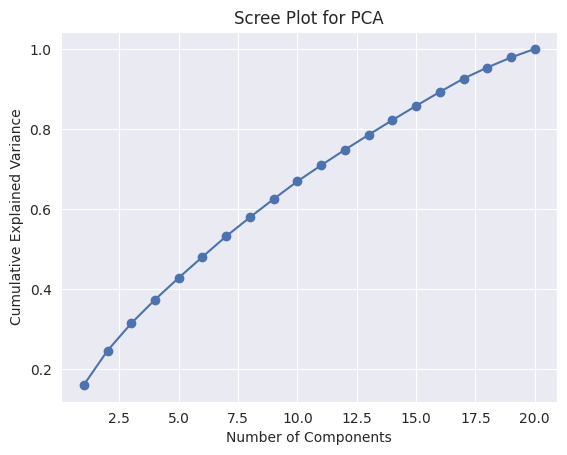

In [29]:
pca = PCA()
pca.fit(X_train)

explained_var_ratio = pca.explained_variance_ratio_
cumulative_explained_var = np.cumsum(explained_var_ratio)

plt.plot(range(1, len(explained_var_ratio) + 1), cumulative_explained_var, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot for PCA')
plt.show()

**Cross Validation**

Using cross-validation to determine the number of components for PCA involves evaluating the performance of your model using different numbers of components and selecting the number that gives the best performance.

In [30]:
# Use standardized dataset 'std_data' and corresponding target 'data_y'
n_components_range = range(1, len(std_data.columns) + 1)  # Range of possible n_components values

# Initialize an empty list to store cross-validation scores
cross_val_scores = []

# Loop through different n_components values
for n_components in n_components_range:
    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(std_data)

    # Use a model of your choice (e.g., LogisticRegression) for cross-validation
    model = LogisticRegression()  # Replace with your preferred model
    scores = cross_val_score(model, X_pca, data_y, cv=5)  # 5-fold cross-validation
    cross_val_scores.append(np.mean(scores))

# Find the n_components that gives the best cross-validation score
best_n_components = n_components_range[np.argmax(cross_val_scores)]

print(f"Best n_components: {best_n_components}")

Best n_components: 18


In [31]:
pca=PCA(n_components=18) # split in 18 components

X_train_pca = pca.fit_transform(X_train)

factors_Df = pd.DataFrame(data = X_train_pca, columns =['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18'])

factors_Df.index=X_train.index

In [32]:
factors_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18
31141,-1.105420,-1.671998,-0.080966,1.371994,-0.291682,0.134084,0.212100,0.035224,-0.689984,-1.389541,-0.124883,-0.733262,-0.956414,-0.316198,0.084191,0.253088,-0.715115,0.547128
98230,-0.866881,0.301305,-0.894761,-0.885181,0.287937,0.706290,0.773267,0.373159,-0.361529,0.483058,0.022547,0.175884,0.414752,0.191389,-1.070774,-0.819132,-0.137431,0.530343
89662,-0.298341,-2.018630,-0.026214,0.318554,0.917045,0.271364,-0.233252,-0.128680,0.173700,-0.854626,-0.577280,0.603928,-1.087869,-0.042514,-0.181276,-0.917951,0.172019,0.142104
208255,-2.079302,-0.557331,0.135129,-0.108735,0.654813,1.043982,0.735828,-0.174711,0.144642,-0.441340,-0.323726,-0.332410,-0.822837,0.517721,0.466533,-0.167471,-1.115785,0.260648
233415,0.572532,-1.090707,1.329494,-0.276991,0.161389,-1.296785,-0.860098,-0.002481,-0.050802,-0.433713,-0.225578,0.725253,-0.108107,0.161679,-0.725002,-0.389538,-1.754134,1.352424


- The lines of code below
- Calculate and print various metrics related to the explained variance in a PCA analysis

Line 1: The first line prints the explained variance ratio for each principal component. The explained variance ratio indicates the proportion of the total variance in the data that each principal component accounts for. Each value in the printed array represents the percentage of variance explained by the corresponding principal component.

Line 2: The second line calculates and prints the cumulative explained variance ratio. It shows the cumulative proportion of the total variance explained by the principal components in increasing order.

Line 3: This line prints the sum of all the explained variance ratios. This value should be equal to 1 (or very close to it) since the sum of the explained variance ratios should account for all the variance in the original data.

Together, these lines of code provide insights into how much information is retained by each principal component and the cumulative information retained as you consider more components. It helps you decide how many principal components you need to keep to retain a sufficient amount of information while reducing dimensionality. This is essential for determining the appropriate number of components to include in your PCA transformation, which can aid in feature selection, noise reduction, and model efficiency.

In [33]:
print(pca.explained_variance_ratio_)
print()
print(pca.explained_variance_ratio_.cumsum())
print()
print(pca.explained_variance_ratio_.sum())

[0.16134924 0.08573982 0.06811996 0.05897661 0.05456357 0.05231392
 0.0514138  0.04722445 0.04569953 0.04405456 0.04008432 0.03869334
 0.03733934 0.03669552 0.03553834 0.0348262  0.03331345 0.02764947]

[0.16134924 0.24708906 0.31520902 0.37418563 0.4287492  0.48106312
 0.53247692 0.57970137 0.6254009  0.66945546 0.70953978 0.74823313
 0.78557246 0.82226798 0.85780632 0.89263252 0.92594597 0.95359544]

0.9535954401603023


The array [0.16134924, 0.08573982, 0.06811996, ..., 0.03331345, 0.02764947] represents the explained variance ratio associated with each principal component. This array shows that the first principal component explains approximately 16.13% of the total variance, the second principal component explains about 8.57%, the third explains about 6.81%, and so on.

The array [0.16134924, 0.24708906, 0.31520902, ..., 0.92594597, 0.95359544] represents the cumulative explained variance ratio up to each principal component. This array provides insight into the total amount of variance explained by considering an increasing number of principal components. For example, the first component alone explains around 16.13% of the total variance, but the first two components combined explain about 24.71%, and so on.

The value 0.953595440160305 represents the cumulative explained variance ratio using all the available principal components. In this case, approximately 95.36% of the total variability in the original data is captured by all the principal components.

Interpretation:

The explained variance ratio helps you understand how much information is retained when reducing the dimensionality of your data. In your case, with around 95.36% cumulative explained variance using all available principal components, you're capturing a significant portion of the original data's variability. This can be considered quite good for many applications, as it suggests that the reduced feature space still retains a large amount of relevant information.

Keep in mind that the choice of how many principal components to retain depends on the specific goals of your analysis. If dimensionality reduction is a primary goal, capturing such a high percentage of the variance may be sufficient. However, if you're aiming for very high fidelity in representing the original data, you might consider retaining more principal components.

### Visualization of the explained variance

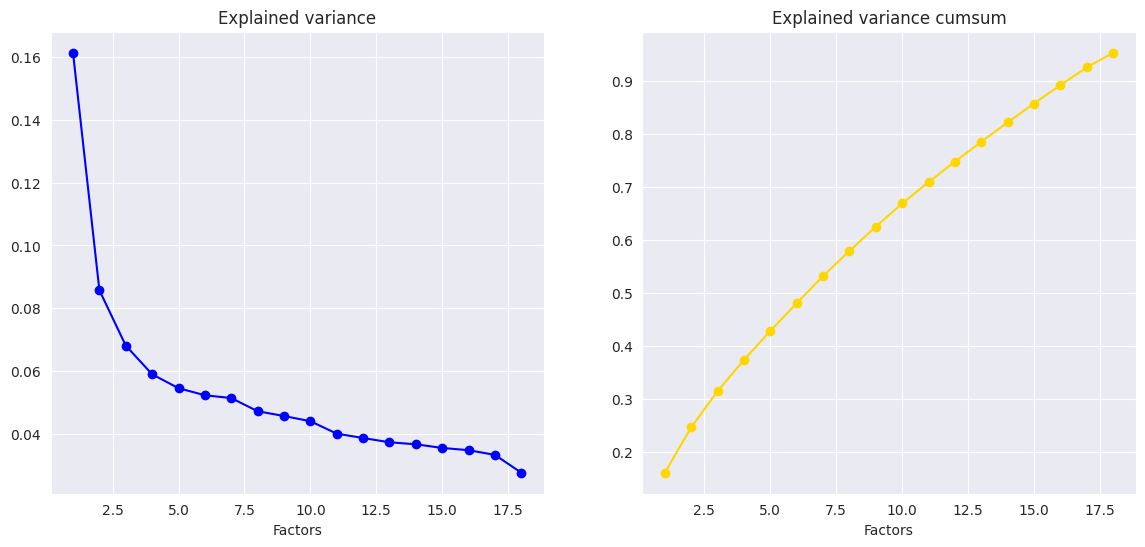

In [34]:
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.plot(np.arange(1,19),pca.explained_variance_ratio_,color='b',marker='o')
ax2.plot(np.arange(1,19),np.cumsum(pca.explained_variance_ratio_),color='gold',marker='o')

ax1.set_xlabel('Factors')
ax1.set_title('Explained variance')
ax2.set_xlabel('Factors')
ax2.set_title('Explained variance cumsum')

plt.show()

### **Predictive analysis**

**PCA**

In [35]:
# Initialize classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Initialize PCA and transform X_test
pca = PCA(n_components=18)  # Use the appropriate number of components
pca.fit(X_train)
X_test_pca = pca.transform(X_test)

# Evaluate each classifier with PCA-transformed features
for name, classifier in classifiers:
    print(f"--- {name} ---")

    # Train the classifier with PCA-transformed features
    classifier.fit(X_train_pca, y_train)

    # Make predictions on the PCA-transformed test data
    pca_predictions = classifier.predict(X_test_pca)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, pca_predictions)
    precision = precision_score(y_test, pca_predictions, average='macro')
    recall = recall_score(y_test, pca_predictions, average='macro')
    f1 = f1_score(y_test, pca_predictions, average='macro')

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_pca)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_pca), multi_class='ovr')

    balanced_accuracy = balanced_accuracy_score(y_test, pca_predictions)
    confusion = confusion_matrix(y_test, pca_predictions)

    # Print evaluation results
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("ROC AUC: {:.2f}".format(roc_auc))
    print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
    print("Confusion Matrix:")
    print(confusion)
    print()


--- Random Forest ---
Accuracy: 0.84
Precision: 0.44
Recall: 0.39
F1 Score: 0.39
ROC AUC: 0.73
Balanced Accuracy: 0.39
Confusion Matrix:
[[41146    58  1591]
 [  843     2    99]
 [ 5637    14  1346]]

--- Gradient Boosting ---
Accuracy: 0.85
Precision: 0.47
Recall: 0.37
F1 Score: 0.38
ROC AUC: 0.78
Balanced Accuracy: 0.37
Confusion Matrix:
[[42103     6   686]
 [  886     0    58]
 [ 6034     1   962]]

--- Logistic Regression ---
Accuracy: 0.85
Precision: 0.47
Recall: 0.38
F1 Score: 0.39
ROC AUC: 0.77
Balanced Accuracy: 0.38
Confusion Matrix:
[[41835     0   960]
 [  874     0    70]
 [ 5787     0  1210]]

--- K-Nearest Neighbors ---
Accuracy: 0.83
Precision: 0.44
Recall: 0.39
F1 Score: 0.40
ROC AUC: 0.65
Balanced Accuracy: 0.39
Confusion Matrix:
[[40734    18  2043]
 [  824     2   118]
 [ 5517    18  1462]]



**LDA**

In [ ]:
# Initialize classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier())
]

# Initialize LDA and transform X_test
lda = LinearDiscriminantAnalysis(n_components=None)  # You can specify the number of components or let it determine automatically
lda.fit(X_train, y_train)
X_test_lda = lda.transform(X_test)

# Evaluate each classifier with LDA-transformed features
for name, classifier in classifiers:
    print(f"--- {name} ---")

    # Train the classifier with LDA-transformed features
    classifier.fit(X_train_lda, y_train)

    # Make predictions on the LDA-transformed test data
    lda_predictions = classifier.predict(X_test_lda)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, lda_predictions)
    precision = precision_score(y_test, lda_predictions, average='macro')
    recall = recall_score(y_test, lda_predictions, average='macro')
    f1 = f1_score(y_test, lda_predictions, average='macro')

    # ROC AUC calculation for binary and multiclass classification
    if len(np.unique(y_train)) == 2:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_lda)[:, 1])
    else:
        roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test_lda), multi_class='ovr')

    balanced_accuracy = balanced_accuracy_score(y_test, lda_predictions)
    confusion = confusion_matrix(y_test, lda_predictions)

    # Print evaluation results
    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1 Score: {:.2f}".format(f1))
    print("ROC AUC: {:.2f}".format(roc_auc))
    print("Balanced Accuracy: {:.2f}".format(balanced_accuracy))
    print("Confusion Matrix:")
    print(confusion)
    print()
